In [1]:
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [5]:
from jmd_imagescraper.core import * 
#from pathlib import Path
from jmd_imagescraper.imagecleaner import *

In [6]:
animals = ['dogs, cats, snakes']
path = Path.cwd()/"animals"


In [7]:
duckduckgo_search(path,"dogs","dogs",max_results=1000)

Duckduckgo search: dogs


[Path('/notebooks/clean/animals/dogs/001_7711b934.jpg'),
 Path('/notebooks/clean/animals/dogs/002_26c1465d.jpg'),
 Path('/notebooks/clean/animals/dogs/003_9a9d6149.jpg'),
 Path('/notebooks/clean/animals/dogs/004_2529905a.jpg'),
 Path('/notebooks/clean/animals/dogs/005_3f26f280.jpg'),
 Path('/notebooks/clean/animals/dogs/006_25986058.jpg'),
 Path('/notebooks/clean/animals/dogs/007_d206d8cc.jpg'),
 Path('/notebooks/clean/animals/dogs/008_ec6484f9.jpg'),
 Path('/notebooks/clean/animals/dogs/009_7663b9b3.jpg'),
 Path('/notebooks/clean/animals/dogs/010_a79e69fb.jpg'),
 Path('/notebooks/clean/animals/dogs/011_7fdd8b40.jpg'),
 Path('/notebooks/clean/animals/dogs/012_9d5dba8e.jpg'),
 Path('/notebooks/clean/animals/dogs/013_5a7edd48.jpg'),
 Path('/notebooks/clean/animals/dogs/014_f2389f35.jpg'),
 Path('/notebooks/clean/animals/dogs/015_5198d555.jpg'),
 Path('/notebooks/clean/animals/dogs/016_fdc55601.jpg'),
 Path('/notebooks/clean/animals/dogs/017_a6966c9b.jpg'),
 Path('/notebooks/clean/animals

In [8]:
duckduckgo_search(path,"cats","cats",max_results=1000)
duckduckgo_search(path,"snakes","snakes",max_results=1000)

Duckduckgo search: cats


Exception occured while retrieving https://tse1.mm.bing.net/th?id=OIP.iZgXn-BpulxW8uAa6tg3IAHaHa&pid=Api
Exception occured while retrieving https://tse2.mm.bing.net/th?id=OIP.p2TfsSGl_4iuOPABSC5jTQHaG-&pid=Api
Duckduckgo search: snakes


Exception occured while retrieving https://tse2.mm.bing.net/th?id=OIP.I2npfY13uwQN1LhCRH67xgHaGf&pid=Api
Exception occured while retrieving https://tse3.mm.bing.net/th?id=OIP.JA1PSV_qeEUftOI-FhaGlAHaHa&pid=Api


[Path('/notebooks/clean/animals/snakes/001_1281eea6.jpg'),
 Path('/notebooks/clean/animals/snakes/002_de85f1ed.jpg'),
 Path('/notebooks/clean/animals/snakes/003_7f9d5d9e.jpg'),
 Path('/notebooks/clean/animals/snakes/004_e54ca4c7.jpg'),
 Path('/notebooks/clean/animals/snakes/005_49ad28f3.jpg'),
 Path('/notebooks/clean/animals/snakes/006_7c92b026.jpg'),
 Path('/notebooks/clean/animals/snakes/007_57ee9fcd.jpg'),
 Path('/notebooks/clean/animals/snakes/008_fda68f86.jpg'),
 Path('/notebooks/clean/animals/snakes/009_74a910da.jpg'),
 Path('/notebooks/clean/animals/snakes/010_8190d0b3.jpg'),
 Path('/notebooks/clean/animals/snakes/011_86b0df6d.jpg'),
 Path('/notebooks/clean/animals/snakes/012_653f82e8.jpg'),
 Path('/notebooks/clean/animals/snakes/013_069b6dd6.jpg'),
 Path('/notebooks/clean/animals/snakes/014_f240bde4.jpg'),
 Path('/notebooks/clean/animals/snakes/015_5f6ebe17.jpg'),
 Path('/notebooks/clean/animals/snakes/016_5bb7e324.jpg'),
 Path('/notebooks/clean/animals/snakes/017_73c6d17a.jpg'

In [9]:
display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [10]:
fns = get_image_files(path)
fns

(#2849) [Path('/notebooks/clean/animals/cats/131_a904f1a1.jpg'),Path('/notebooks/clean/animals/cats/915_89ffa79e.jpg'),Path('/notebooks/clean/animals/cats/901_1af7b390.jpg'),Path('/notebooks/clean/animals/cats/539_6188b1b0.jpg'),Path('/notebooks/clean/animals/cats/054_185d5a23.jpg'),Path('/notebooks/clean/animals/cats/705_3813965b.jpg'),Path('/notebooks/clean/animals/cats/213_8756fcd8.jpg'),Path('/notebooks/clean/animals/cats/108_43612f01.jpg'),Path('/notebooks/clean/animals/cats/514_6f3f0caf.jpg'),Path('/notebooks/clean/animals/cats/468_54d83fb1.jpg')...]

In [11]:
failed = verify_images(fns)
failed

(#0) []

In [22]:
animals = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [23]:
dls = animals.dataloaders(path)

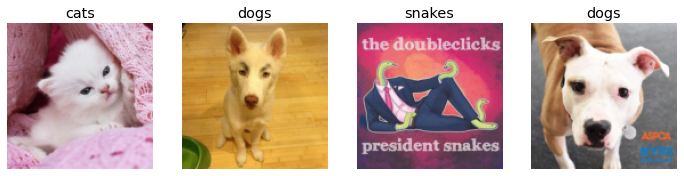

In [24]:
dls.valid.show_batch(max_n=4, nrows=1)

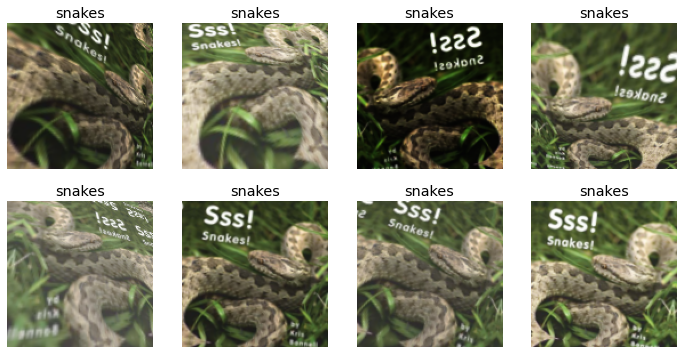

In [25]:
animals = animals.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = animals.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [26]:
animals = animals.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = animals.dataloaders(path)

In [27]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.613318,0.696147,0.192240,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.269546,0.746904,0.204586,00:33
1,0.223408,0.671139,0.172840,00:33
2,0.152006,0.948948,0.220459,00:33
3,0.112008,0.871588,0.208113,00:33


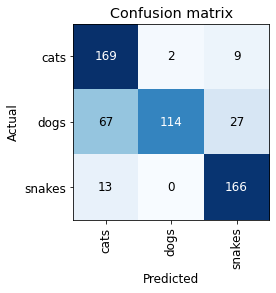

In [28]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

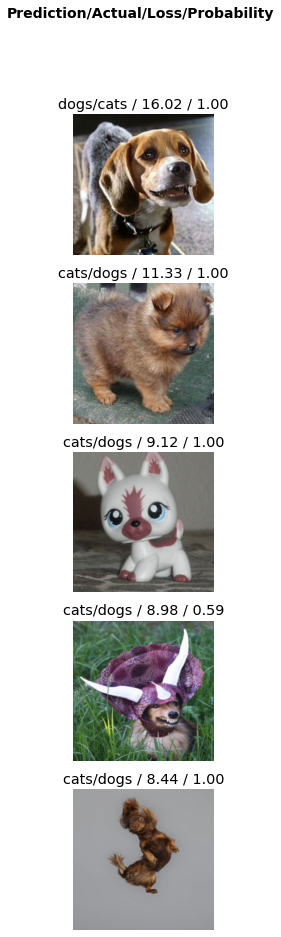

In [19]:
interp.plot_top_losses(5, nrows=5)

In [20]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [21]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [29]:
learn.export()

In [30]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [32]:
learn_inf = load_learner(path/'export.pkl')

In [33]:
learn_inf.dls.vocab

['cats', 'dogs', 'snakes']

In [34]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [35]:
img = PILImage.create(btn_upload.data[-1])

In [36]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [41]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: cats; Probability: 0.7862')

In [39]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [40]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [42]:
btn_upload = widgets.FileUpload()

In [43]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])